Facial Emotion detection using Deep Learning Model

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

In [3]:
train_data_dir='train'   #just used this way to load downloaded train and test file
validation_data_dir='test'

### adding more code and features

In [4]:
#For counting the total train and test images we have
def count_images_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp')):  # Add more extensions if needed
                count += 1
    return count

#train_image_dir = "path/to/train_images"
#test_image_dir = "path/to/test_images"

total_train_images = count_images_in_directory(train_data_dir)
total_test_images = count_images_in_directory(validation_data_dir)

print(f"Total images in the train directory: {total_train_images}")
print(f"Total images in the test directory: {total_test_images}")

Total images in the train directory: 28709
Total images in the test directory: 7178


In [5]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def count_images_in_class_directory(directory, class_label):
    count = 0
    class_dir = os.path.join(directory, class_label)
    if os.path.exists(class_dir):
        for root, dirs, files in os.walk(class_dir):
            for file in files:
                if file.endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp')):  # Add more extensions if needed
                    count += 1
    return count
# Count the total images for each class in the train directory
train_class_counts = {}
for label in class_labels:
    count = count_images_in_class_directory(train_data_dir, label)
    train_class_counts[label] = count
# Count the total images for each class in the test directory
test_class_counts = {}
for label in class_labels:
    count = count_images_in_class_directory(validation_data_dir, label)
    test_class_counts[label] = count
# Print the total number of images for each class
for label in class_labels:
    print(f"Train - {label}: {train_class_counts[label]} images")
    print(f"Test - {label}: {test_class_counts[label]} images")


Train - Angry: 3995 images
Test - Angry: 958 images
Train - Disgust: 436 images
Test - Disgust: 111 images
Train - Fear: 4097 images
Test - Fear: 1024 images
Train - Happy: 7215 images
Test - Happy: 1774 images
Train - Neutral: 4965 images
Test - Neutral: 1233 images
Train - Sad: 4830 images
Test - Sad: 1247 images
Train - Surprise: 3171 images
Test - Surprise: 831 images


In [6]:
### extra code
import cv2

In [11]:
# Define a function to display example images with larger images and labels
def display_example_images(image_dir, num_images=4, image_size=(8, 8), label_fontsize=12):
    num_emotions = len(os.listdir(image_dir))
    plt.figure(figsize=(image_size[0] * num_images, image_size[1] * num_emotions))
    
    for i, emotion_folder in enumerate(os.listdir(image_dir)):
        emotion_path = os.path.join(image_dir, emotion_folder)
        images = os.listdir(emotion_path)[:num_images]
        
        for j, image in enumerate(images):
            plt.subplot(num_emotions, num_images, i * num_images + j + 1)
            img = cv2.imread(os.path.join(emotion_path, image), cv2.IMREAD_GRAYSCALE)
            plt.imshow(img, cmap='gray')
            plt.title(emotion_folder, fontsize=label_fontsize)  # Increase font size
            plt.axis('off')


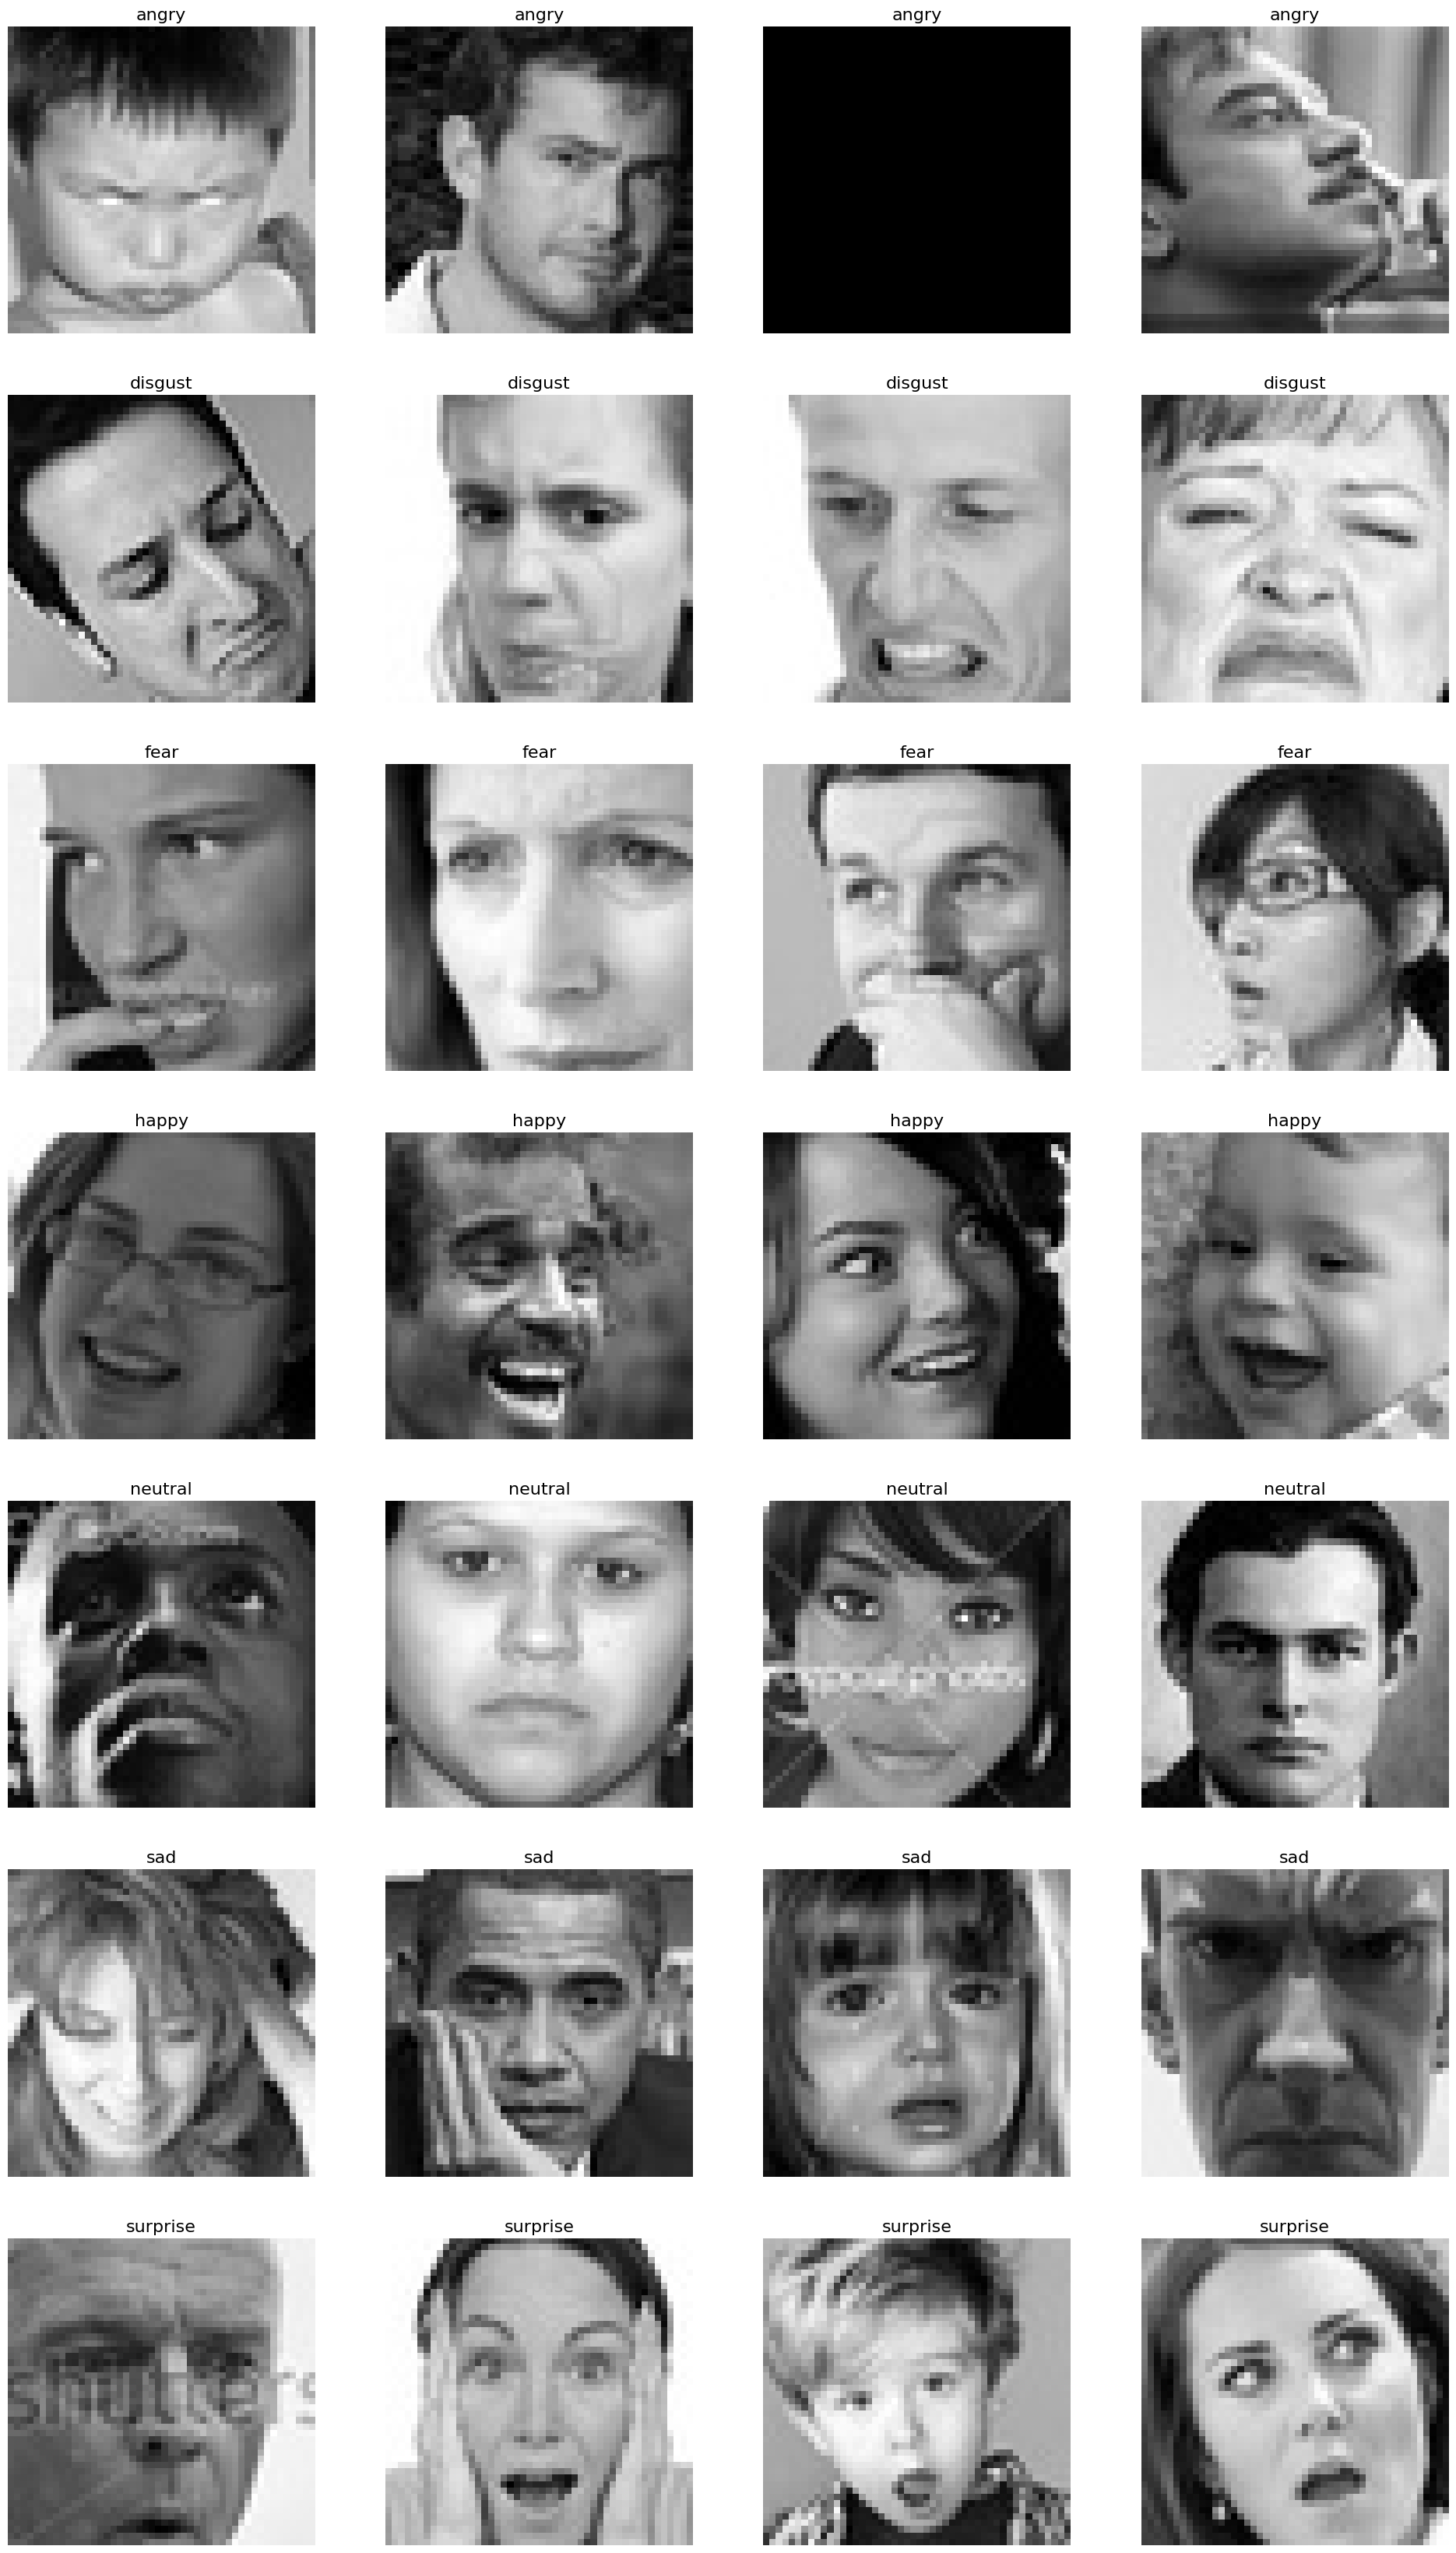

In [14]:
# Display a few example images from the training and testing sets
display_example_images(train_data_dir,num_images=4, image_size=(6, 6),label_fontsize=16)
#display_example_images(validation_data_dir,num_images=4, image_size=(6, 6),label_fontsize=16)

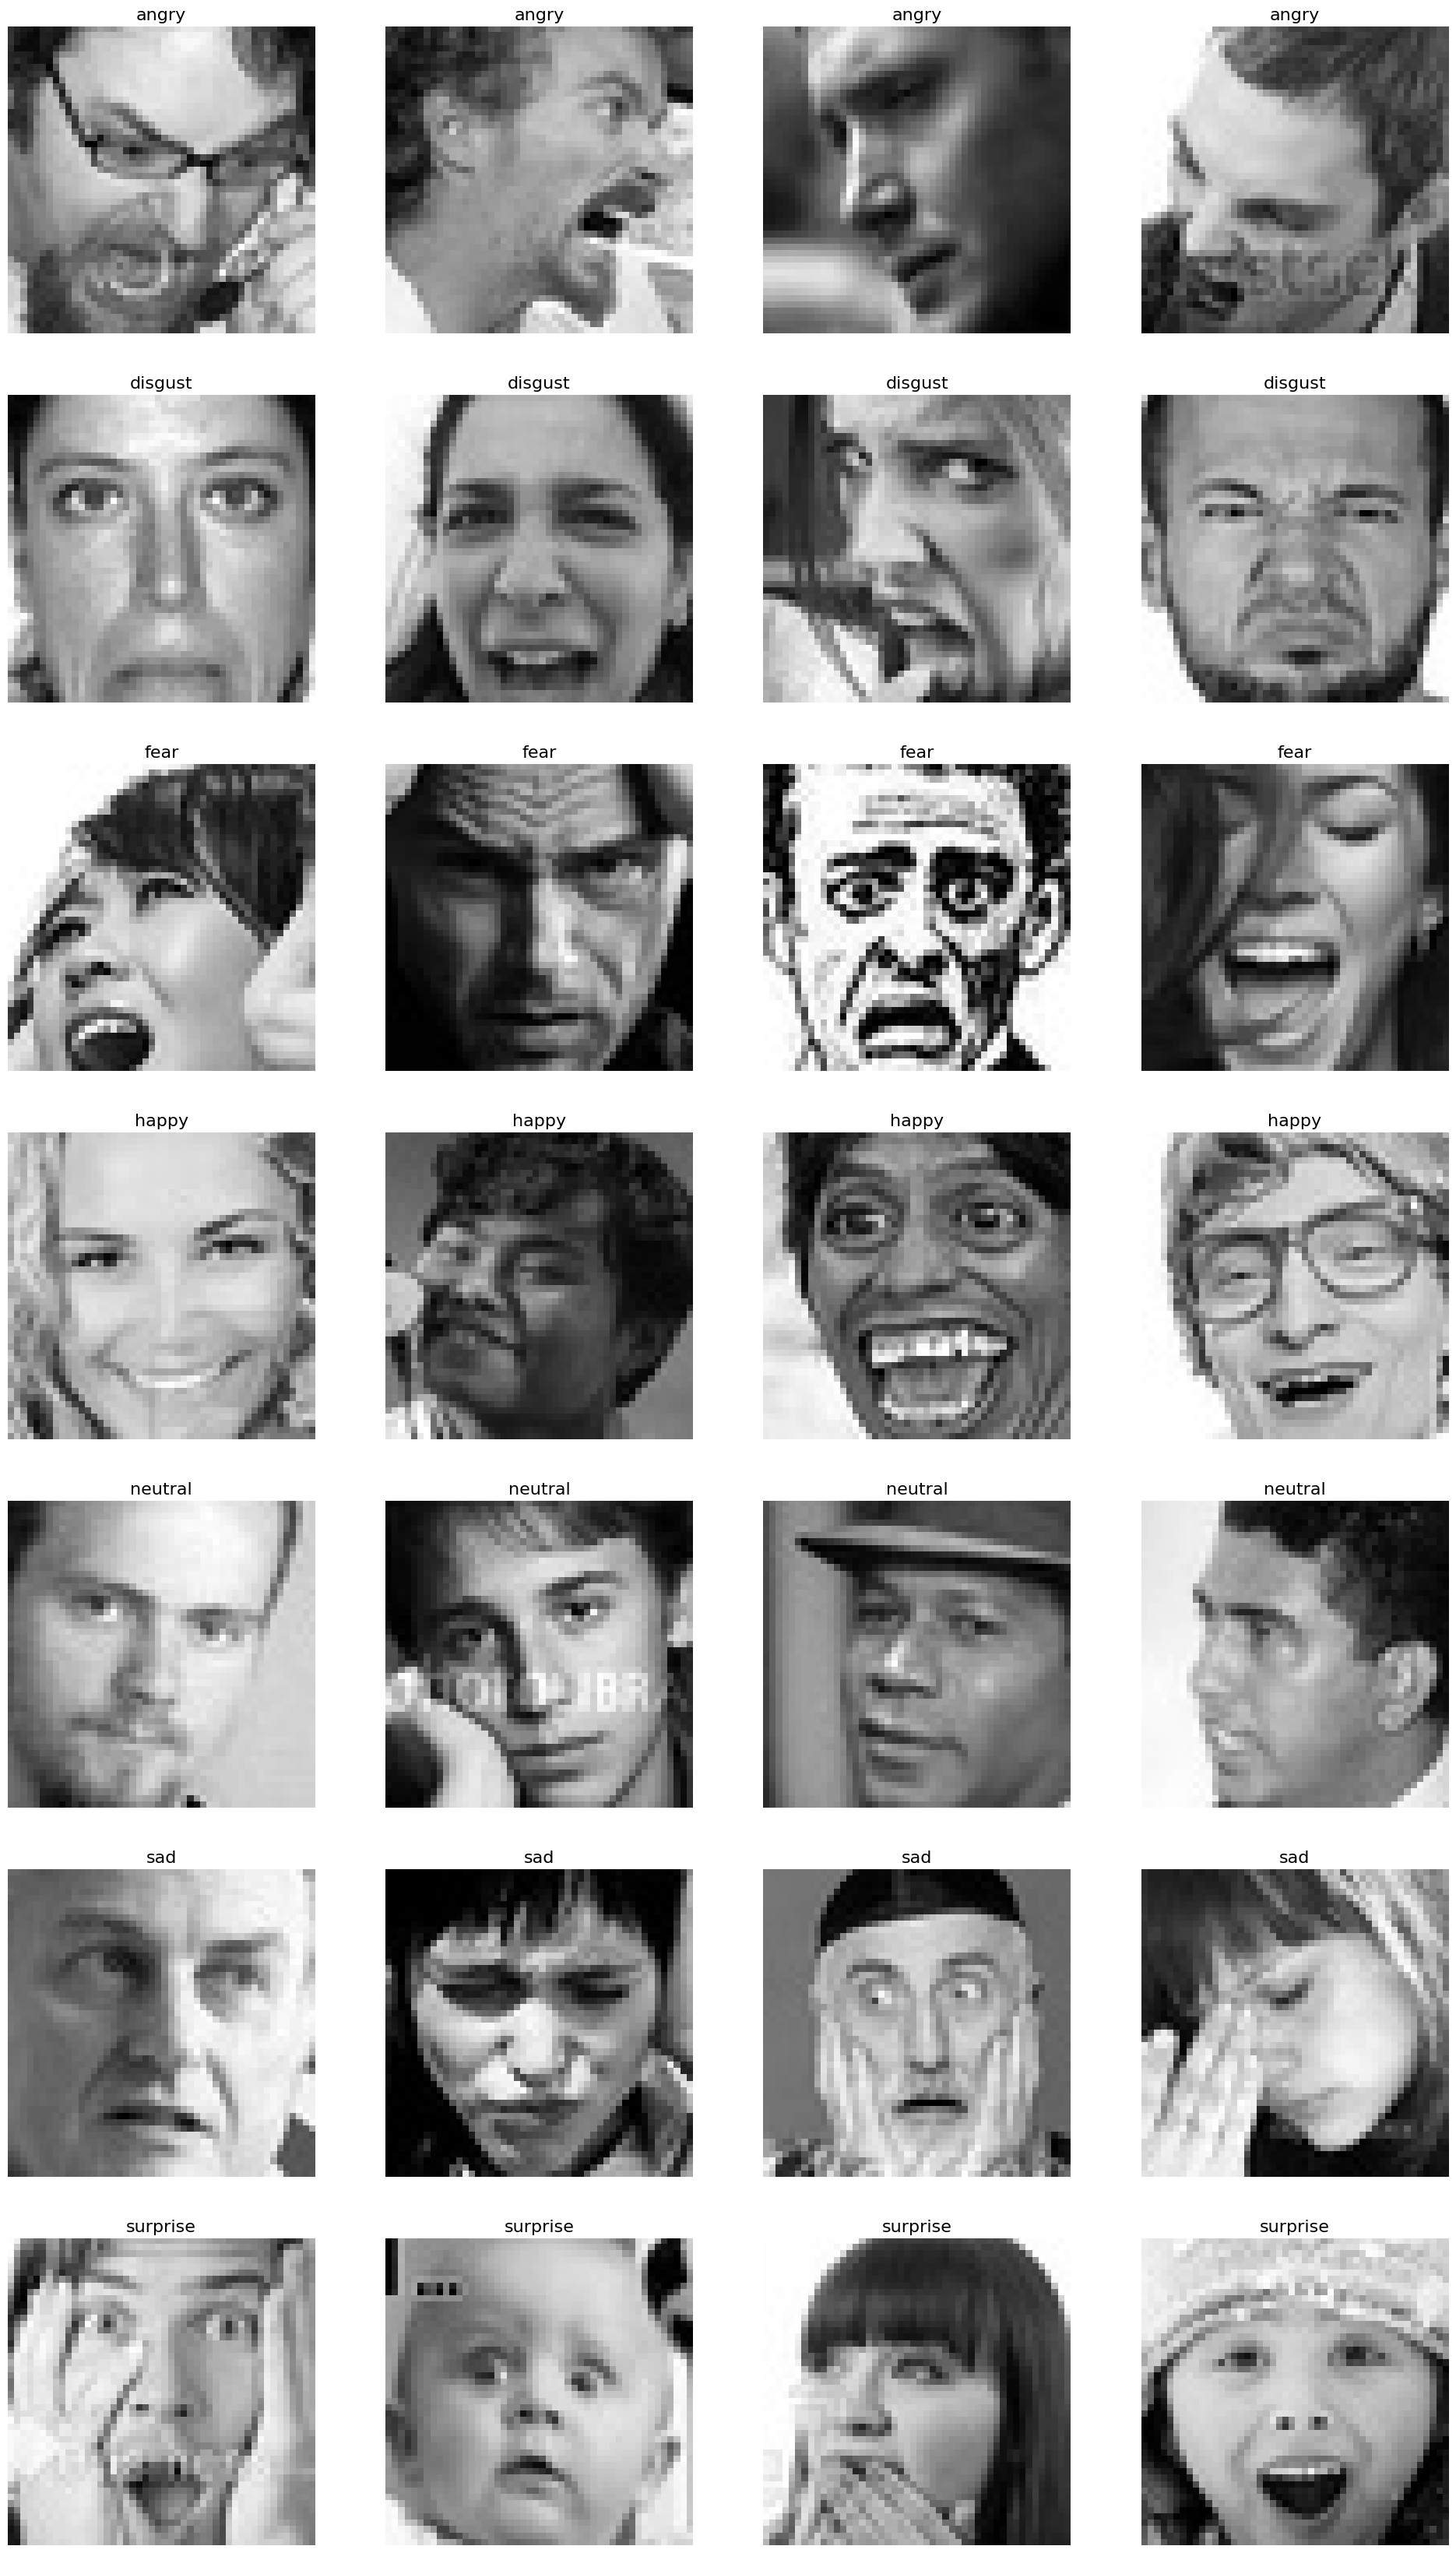

In [15]:
display_example_images(validation_data_dir,num_images=4, image_size=(6, 6),label_fontsize=16)

In [29]:
# Analyze class distribution in training and testing sets
train_class_counts = [len(os.listdir(os.path.join(train_data_dir, emotion))) for emotion in os.listdir(train_data_dir)]
test_class_counts = [len(os.listdir(os.path.join(validation_data_dir, emotion))) for emotion in os.listdir(validation_data_dir)]

Text(0, 0.5, 'Count')

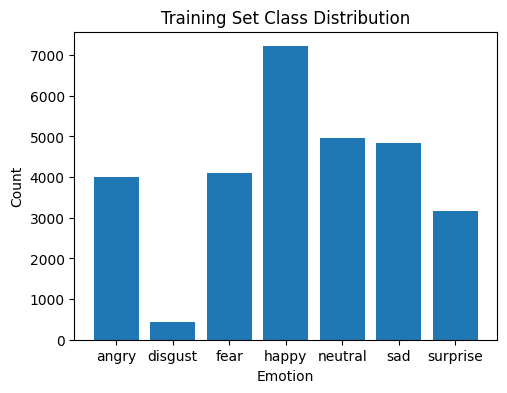

In [30]:
# Visualize class distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(os.listdir(train_data_dir), train_class_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

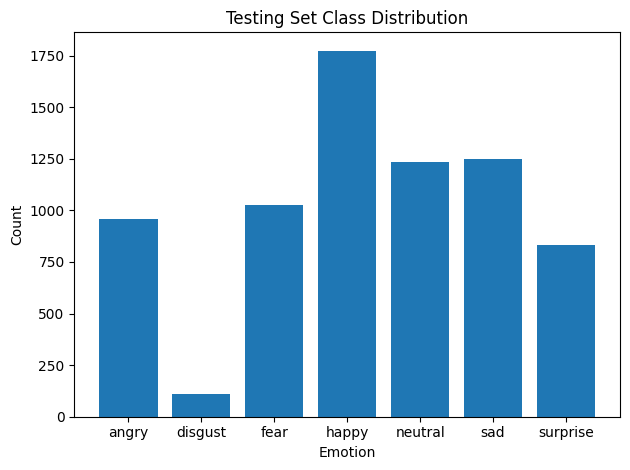

In [31]:
#plt.subplot(1, 2, 2)
plt.bar(os.listdir(validation_data_dir), test_class_counts)
plt.title('Testing Set Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [32]:
#above write code is extra

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,shear_range=0.3,zoom_range=0.3,horizontal_flip=True,fill_mode='nearest')

In [34]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(train_data_dir,color_mode='grayscale',target_size=(IMG_HEIGHT, IMG_WIDTH),
   batch_size=batch_size,
   class_mode='categorical',
   shuffle=True)

Found 28709 images belonging to 7 classes.


In [47]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,color_mode='grayscale',
                                        target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,
                                        class_mode='categorical',shuffle=True)

Found 7178 images belonging to 7 classes.


In [37]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [38]:
img, label = train_generator.__next__()

In [39]:
import random

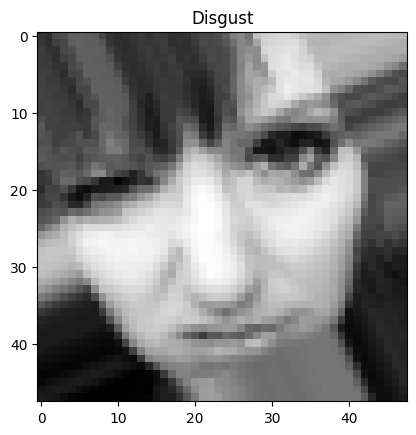

In [82]:
i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [24]:
# Create the model

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

In [27]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [28]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [29]:
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [30]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

In [31]:
model.add(Dense(7, activation='softmax'))

In [32]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [33]:
train_path = "train"
test_path = "test"

In [34]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [35]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [36]:
epochs=20

In [37]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

Epoch 1/20
897/897 [==============================] - 390s 434ms/step - loss: 1.7909 - accuracy: 0.2615 - val_loss: 1.6987 - val_accuracy: 0.3146
Epoch 2/20
897/897 [==============================] - 244s 272ms/step - loss: 1.6936 - accuracy: 0.3172 - val_loss: 1.5857 - val_accuracy: 0.3835
Epoch 3/20
897/897 [==============================] - 253s 282ms/step - loss: 1.5817 - accuracy: 0.3802 - val_loss: 1.4423 - val_accuracy: 0.4468
Epoch 4/20
897/897 [==============================] - 222s 247ms/step - loss: 1.4992 - accuracy: 0.4195 - val_loss: 1.3335 - val_accuracy: 0.4915
Epoch 5/20
897/897 [==============================] - 223s 248ms/step - loss: 1.4446 - accuracy: 0.4397 - val_loss: 1.3007 - val_accuracy: 0.4997
Epoch 6/20
897/897 [==============================] - 224s 250ms/step - loss: 1.3989 - accuracy: 0.4652 - val_loss: 1.2501 - val_accuracy: 0.5191
Epoch 7/20
897/897 [==============================] - 222s 247ms/step - loss: 1.3624 - accuracy: 0.4790 - val_loss: 1.2328 -

In [38]:
model.save('emotion_detection_model_20epochs.h5')

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


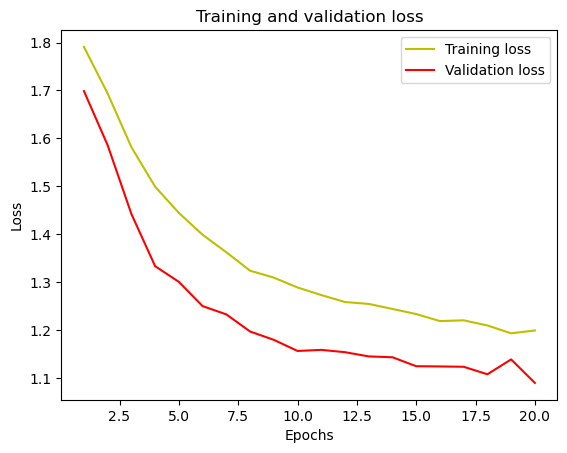

In [39]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

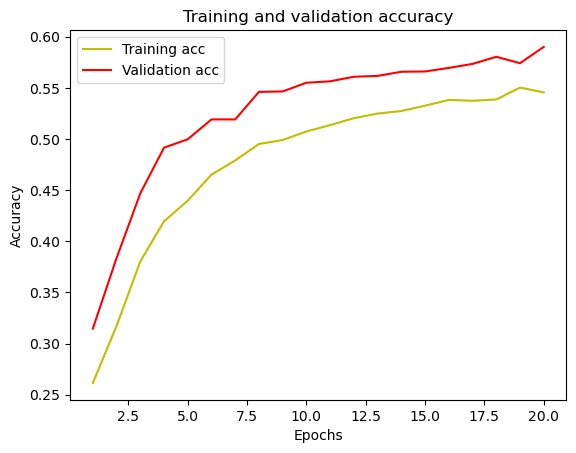

In [41]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
from keras.models import load_model

In [43]:
#Test the model
my_model = load_model('emotion_detection_model_20epochs.h5', compile=False)

In [44]:
#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

1/1 [==============================] - 0s 446ms/step


In [45]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [46]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.4375


In [47]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<Axes: >

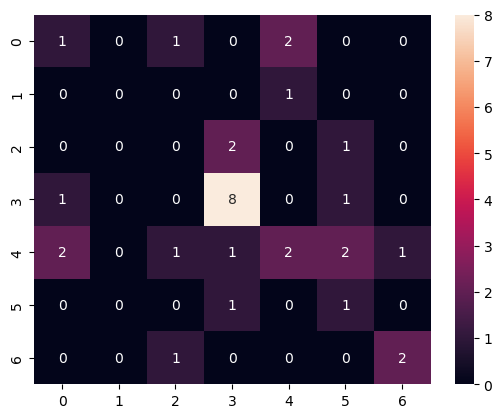

In [48]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [49]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

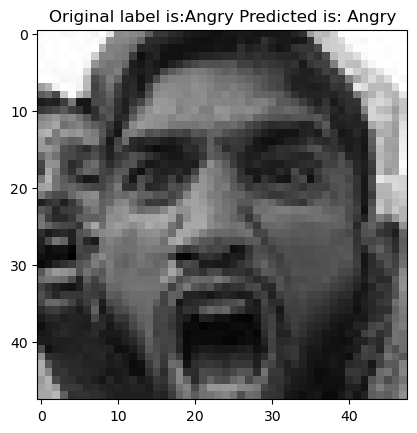

In [53]:
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [55]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/38.1 MB 12.9 MB/s eta 0:00:03
   - -------------------------------------- 1.0/38.1 MB 12.5 MB/s eta 0:00:03
   - -------------------------------------- 1.7/38.1 MB 13.8 MB/s eta 0:00:03
   -- ------------------------------------- 2.4/38.1 MB 14.1 MB/s eta 0:00:03
   --- ------------------------------------ 3.2/38.1 MB 14.4 MB/s eta 0:00:03
   ---- ----------------------------------- 3.9/38.1 MB 14.4 MB/s eta 0:00:03
   ---- ----------------------------------- 4.5/38.1 MB 14.5 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.1 MB 14.6 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/38.1 MB 14.7 MB/s eta 0:00:03
   ----

In [58]:
import cv2
cap = cv2.VideoCapture(0)

In [57]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]


while True:
    ret, frame = cap.read()  # Capture a frame from the webcam

    # Preprocess the frame (resize, convert to grayscale, normalize, etc.)
    # Ensure it matches the input format used during training

    # Predict emotion using the model
    emotion_probabilities = model.predict(frame)
    predicted_emotion = emotion_labels[np.argmax(emotion_probabilities)]

    # Draw the predicted emotion label on the frame
    cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame with emotion label
    cv2.imshow('FER', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()  # Release the webcam
cv2.destroyAllWindows()  # Close OpenCV windows


In [1]:
import cv2
import numpy as np
from keras.models import load_model

In [2]:
# Load the pre-trained emotion detection model
emotion_model = load_model('emotion_detection_model_20epochs.h5')

In [3]:
# Define a list of class labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [4]:
# Create a face cascade classifier for face detection (you may need to adjust the path)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [5]:
# Initialize the webcam (you can specify a different video source if needed)
cap = cv2.VideoCapture(0)

In [6]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region from the frame
        face = gray[y:y + h, x:x + w]

        # Resize the face image to match the model input size (48x48 pixels)
        face = cv2.resize(face, (48, 48))
        face = np.reshape(face, [1, 48, 48, 1])

        # Normalize the pixel values
        face = face / 255.0

        # Perform emotion prediction using the loaded model
        emotion_probabilities = emotion_model.predict(face)
        emotion_label = class_labels[np.argmax(emotion_probabilities)]

        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the predicted emotion label
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame with face detection and emotion prediction
    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


In [7]:
#cap.release()
#cv2.destroyAllWindows()

###
new code added to check data is balanced or not

In [48]:
from collections import Counter

In [49]:
# Get the class distribution in the training dataset
class_distribution = Counter(train_generator.classes)

# Print the distribution
print("Class Distribution in the Training Dataset:")
for class_name, count in class_distribution.items():
    print(f"Class {class_name}: {count} samples")

Class Distribution in the Training Dataset:
Class 0: 3995 samples
Class 1: 436 samples
Class 2: 4097 samples
Class 3: 7215 samples
Class 4: 4965 samples
Class 5: 4830 samples
Class 6: 3171 samples


In [50]:
# Check the class distribution in the test dataset
class_distribution_test = Counter(validation_generator.classes)
print("Class Distribution in the Test Dataset:")
for class_name, count in class_distribution_test.items():
    print(f"Class {class_name}: {count} samples")

Class Distribution in the Test Dataset:
Class 0: 958 samples
Class 1: 111 samples
Class 2: 1024 samples
Class 3: 1774 samples
Class 4: 1233 samples
Class 5: 1247 samples
Class 6: 831 samples
